In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import geometry
import model
import solvers_filled as solvers

In [2]:
mesh, BCs = geometry.getArc()
coordinates, connectivity = mesh['coordinates'], mesh['connectivity']

modelA = model.Model()
modelA.mesh.addNodes(coordinates)
modelA.mesh.addConnectivity(connectivity)

modelA.material.setProperties(40000, 0.2)
modelA.section.setProperties(1)

modelA.setBoundaryConditions(BCs)

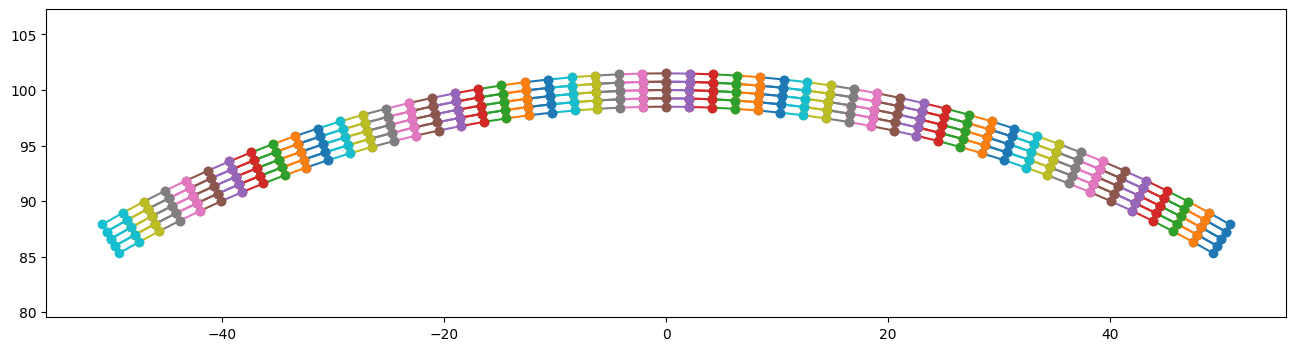

In [3]:
modelA.plotUndeformed(size=(16, 4))

In [4]:
solver = solvers.Static()

solver.setTolerance(1e-3)
solver.setMaxIterations(10)
solver.setSolutionAttempts(5)

## Displacement control

In [5]:
modelD=modelA

In [6]:
solver.setConstraint("Displacement")
uD, lambdasD = solver.solve(modelD, 0.2*np.ones(1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 1.495e-06
Step 2
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 3.479e-07
Step 3
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 2.483e-06
Step 4
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 5.194e-06
Step 5
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 6.062e-06
Step 6
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 5.042e-06
Step 7
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 3.409e-06
Step 8
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 2.039e-06
Step 9
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 1.143e-06
Step 10
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 6.224e-07
Step 11
  Attempt 1
    Solution converged after 3 iterations
    Residual norm 3.374e-07
Step 12
  Attempt 1

Text(0, 0.5, '$\\lambda$')

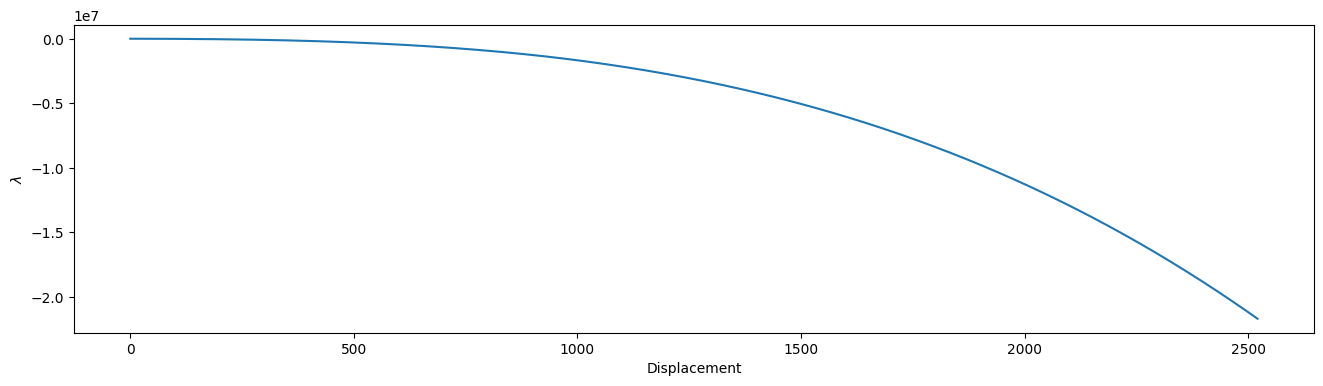

In [7]:
plt.figure(figsize=(16, 4))
plt.plot(uD, lambdasD)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

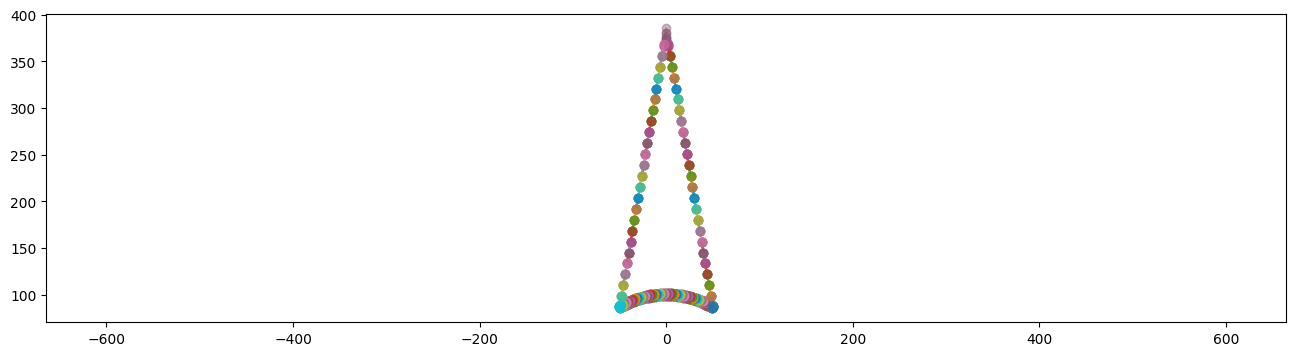

In [8]:
modelD.plotUndeformed(size=(16, 4))
modelD.plotDeformed(scale=1, alpha=0.25)

## Load Control

In [9]:
modelL=modelA

In [10]:
solver.setConstraint("Load")
uL, lambdasL = solver.solve(modelL, 0.2*np.ones(1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 9.845e-11
Step 2
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 9.870e-11
Step 3
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 9.896e-11
Step 4
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 9.916e-11
Step 5
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 9.943e-11
Step 6
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 9.961e-11
Step 7
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 9.990e-11
Step 8
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.001e-10
Step 9
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.004e-10
Step 10
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.007e-10
Step 11
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.009e-10
Step 12
  Attempt 1

Text(0, 0.5, '$\\lambda$')

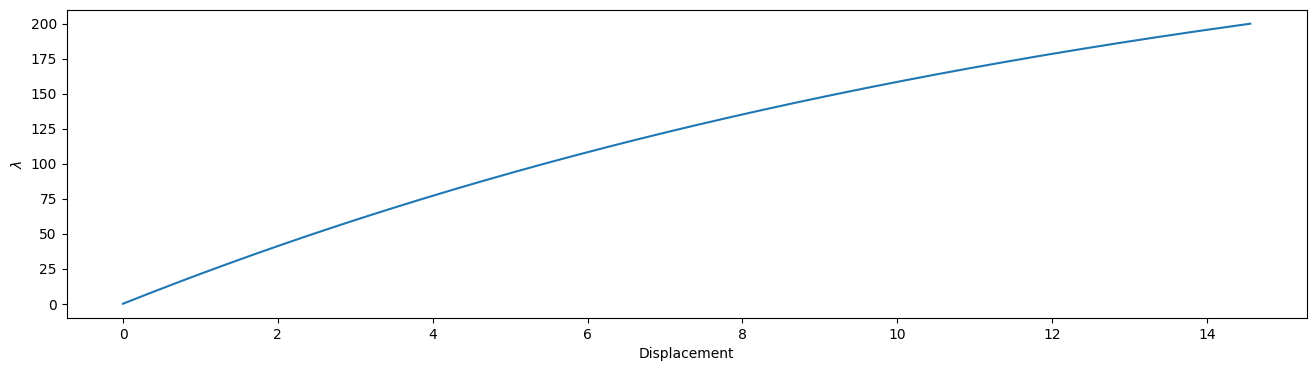

In [11]:
plt.figure(figsize=(16, 4))
plt.plot(uL, lambdasL)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

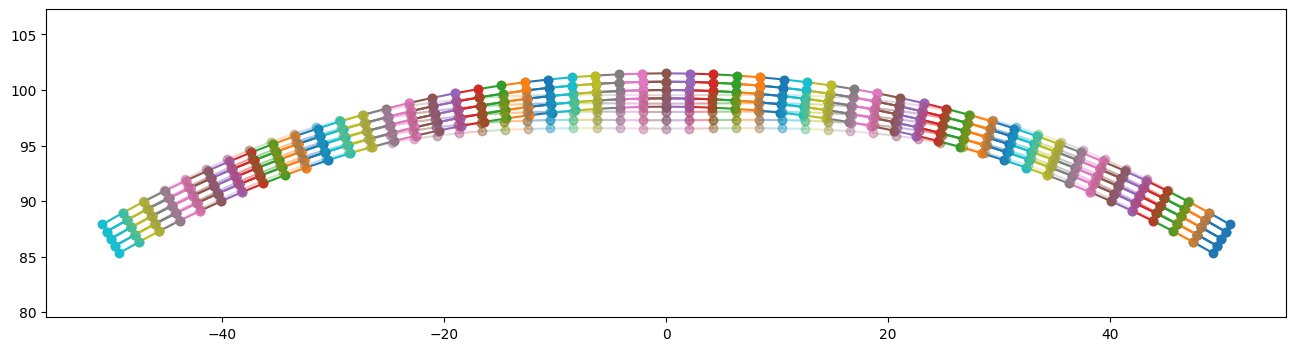

In [12]:
modelL.plotUndeformed(size=(16, 4))
modelL.plotDeformed(scale=1, alpha=0.25)

## Arc method

In [13]:
modelR=modelA

In [14]:
# Arc-length
solver.setConstraint("Arc")
uA, lambdasA = solver.solve(modelA, 0.2*np.ones(1000))


  0%|          | 0/1000 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.245e-04
Step 2
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.248e-04
Step 3
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.251e-04
Step 4
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.254e-04
Step 5
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.257e-04
Step 6
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.260e-04
Step 7
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.263e-04
Step 8
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.266e-04
Step 9
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.269e-04
Step 10
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.272e-04
Step 11
  Attempt 1
    Solution converged after 2 iterations
    Residual norm 1.275e-04
Step 12
  Attempt 1

Text(0, 0.5, '$\\lambda$')

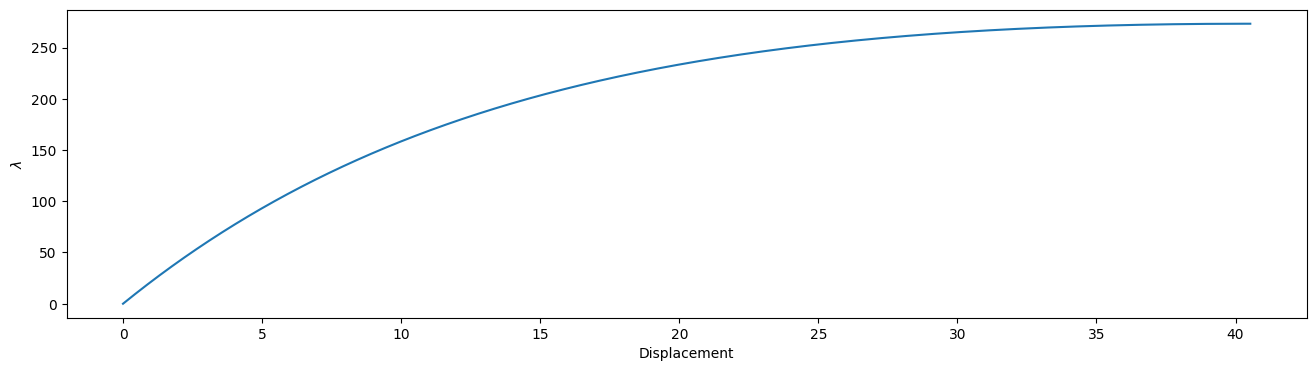

In [15]:
plt.figure(figsize=(16, 4))
plt.plot(uA, lambdasA)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

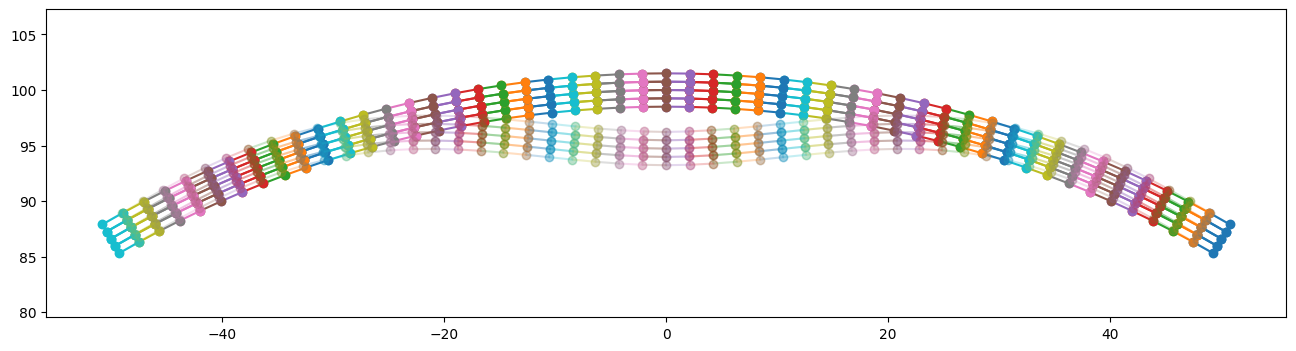

In [16]:
modelA.plotUndeformed(size=(16, 4))
modelA.plotDeformed(scale=1, alpha=0.25)

### Comments:
Displacement and load control methods do not work as they are not able to handle the flattening of the u-lambda curve (non-monotonic), but the arc method algorithm takes forever(500min) without the arc overturning, so maybe the solver is not working correct? Tol was set to 10e-2 and max attempts 10, 6 would have been enough
also more steps are needed to reach snap through apparently?

## Riks Method

In [17]:
# Arc-length
solver.setConstraint("Riks")
#u, lambdas = solver.solve(modelA, np.ones(1000))
uR, lambdasR = solver.solve(modelR, 0.2*np.ones(1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.356e-05
Step 2
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.356e-05
Step 3
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.355e-05
Step 4
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.354e-05
Step 5
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.353e-05
Step 6
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.351e-05
Step 7
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.349e-05
Step 8
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.347e-05
Step 9
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.345e-05
Step 10
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.342e-05
Step 11
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.339e-05
Step 12
  Attempt 1

Text(0, 0.5, '$\\lambda$')

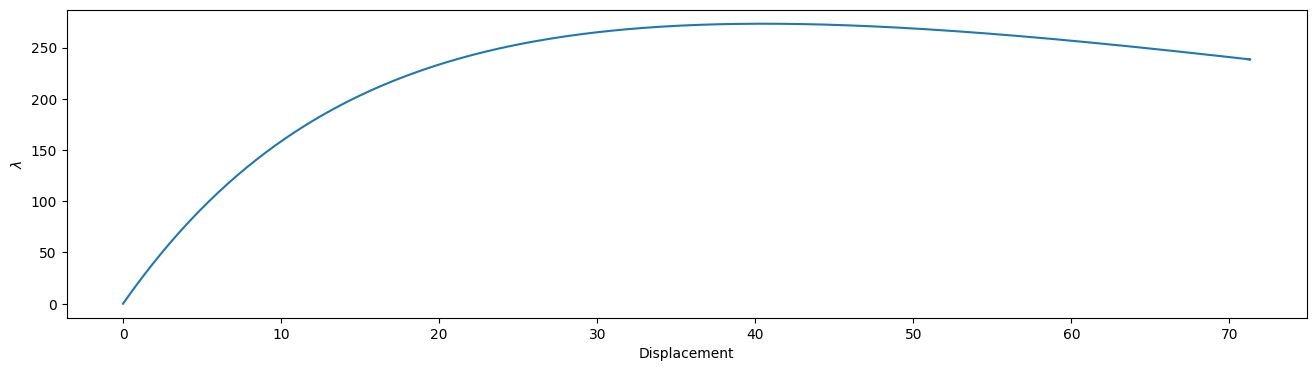

In [18]:
plt.figure(figsize=(16, 4))
plt.plot(uR, lambdasR)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

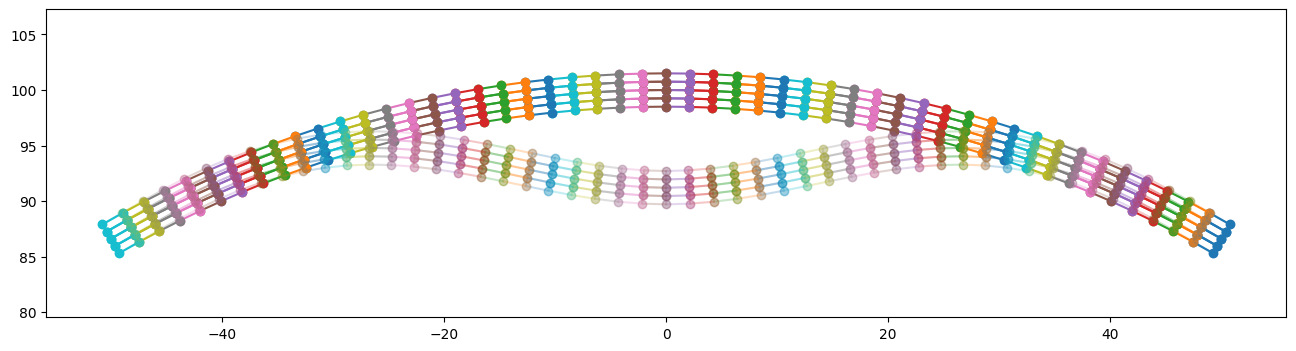

In [19]:
modelR.plotUndeformed(size=(16, 4))
modelR.plotDeformed(scale=1, alpha=0.25)

Comment: riks starts out a bit slower, but generally performs very well for 0.5 increments, would be worth to start with 0.5 straight away. in general smaller steps with less maximal iterations